## Classes = 50

<IPython.core.display.Javascript object>

FOOD DETECTION - 50 CLASSES WITH VISUALIZATION
Mounted at /content/drive
Using Colab cache for faster access to the 'food-101' dataset.


/tmp/ipython-input-1433509561.py:191: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Model ready

TRAINING

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3703 - loss: 2.5087
Epoch 1: val_accuracy improved from -inf to 0.65744, saving model to /content/drive/MyDrive/AAI521-Final-Project/outputs/model_50class.keras
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 111s 72ms/step - accuracy: 0.3703 - loss: 2.5083 - val_accuracy: 0.6574 - val_loss: 1.1980
Epoch 2/20
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5627 - loss: 1.5875
Epoch 2: val_accuracy improved from 0.65744 to 0.67264, saving model to /content/drive/MyDrive/AAI521-Final-Project/outputs/model_50class.keras
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.5627 - loss: 1.5875 - val_accuracy: 0.6726 - val_loss: 1.1356
Epoch 3/20
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5949 - loss: 1.4427
Epoch 3: val_accuracy improved from 0.67264 to 0.68648, saving model to /content/drive/MyDrive/AAI521-Final-Project/outputs/model_50c

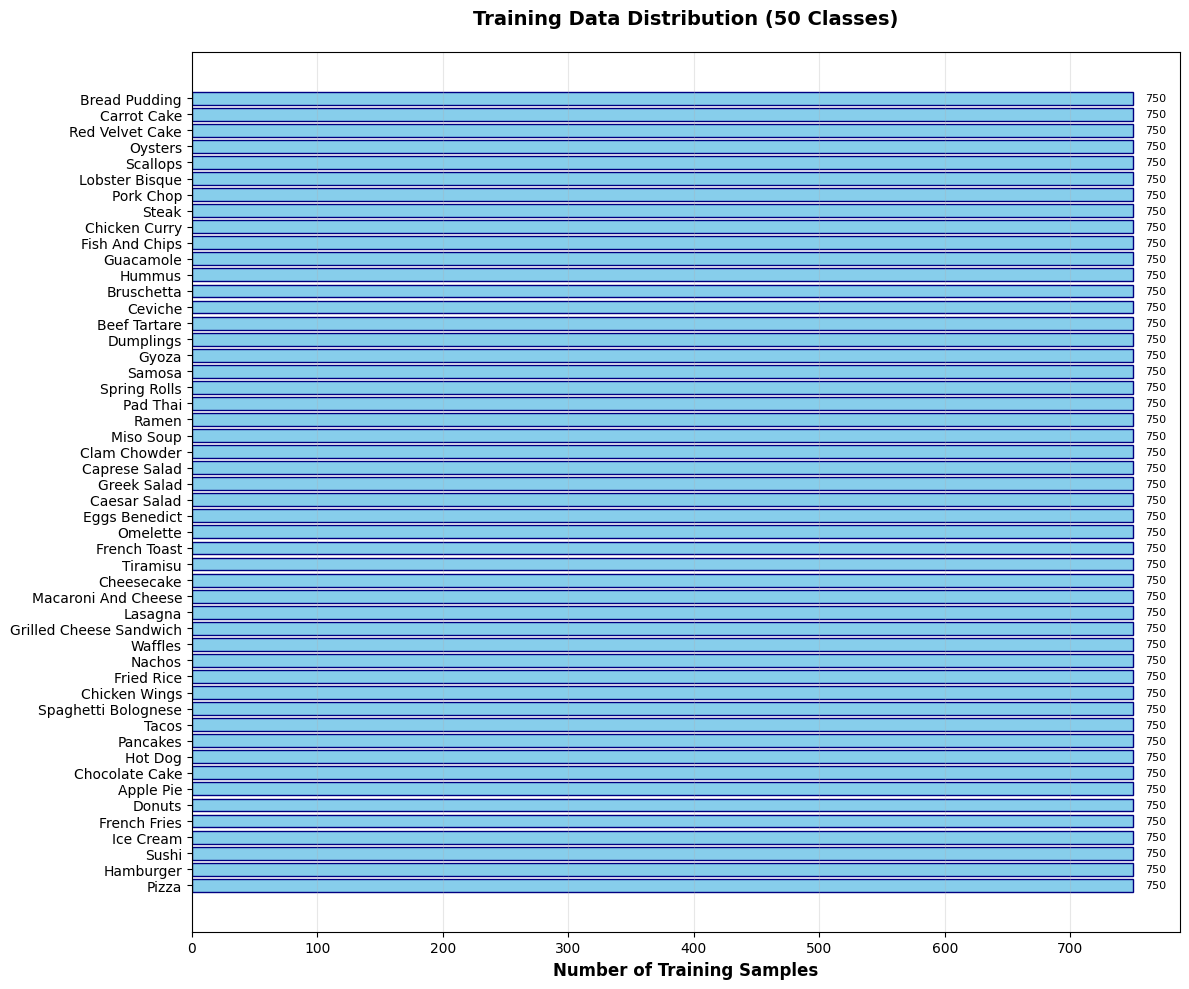

 Displayed and saved

2. Creating sample food images...


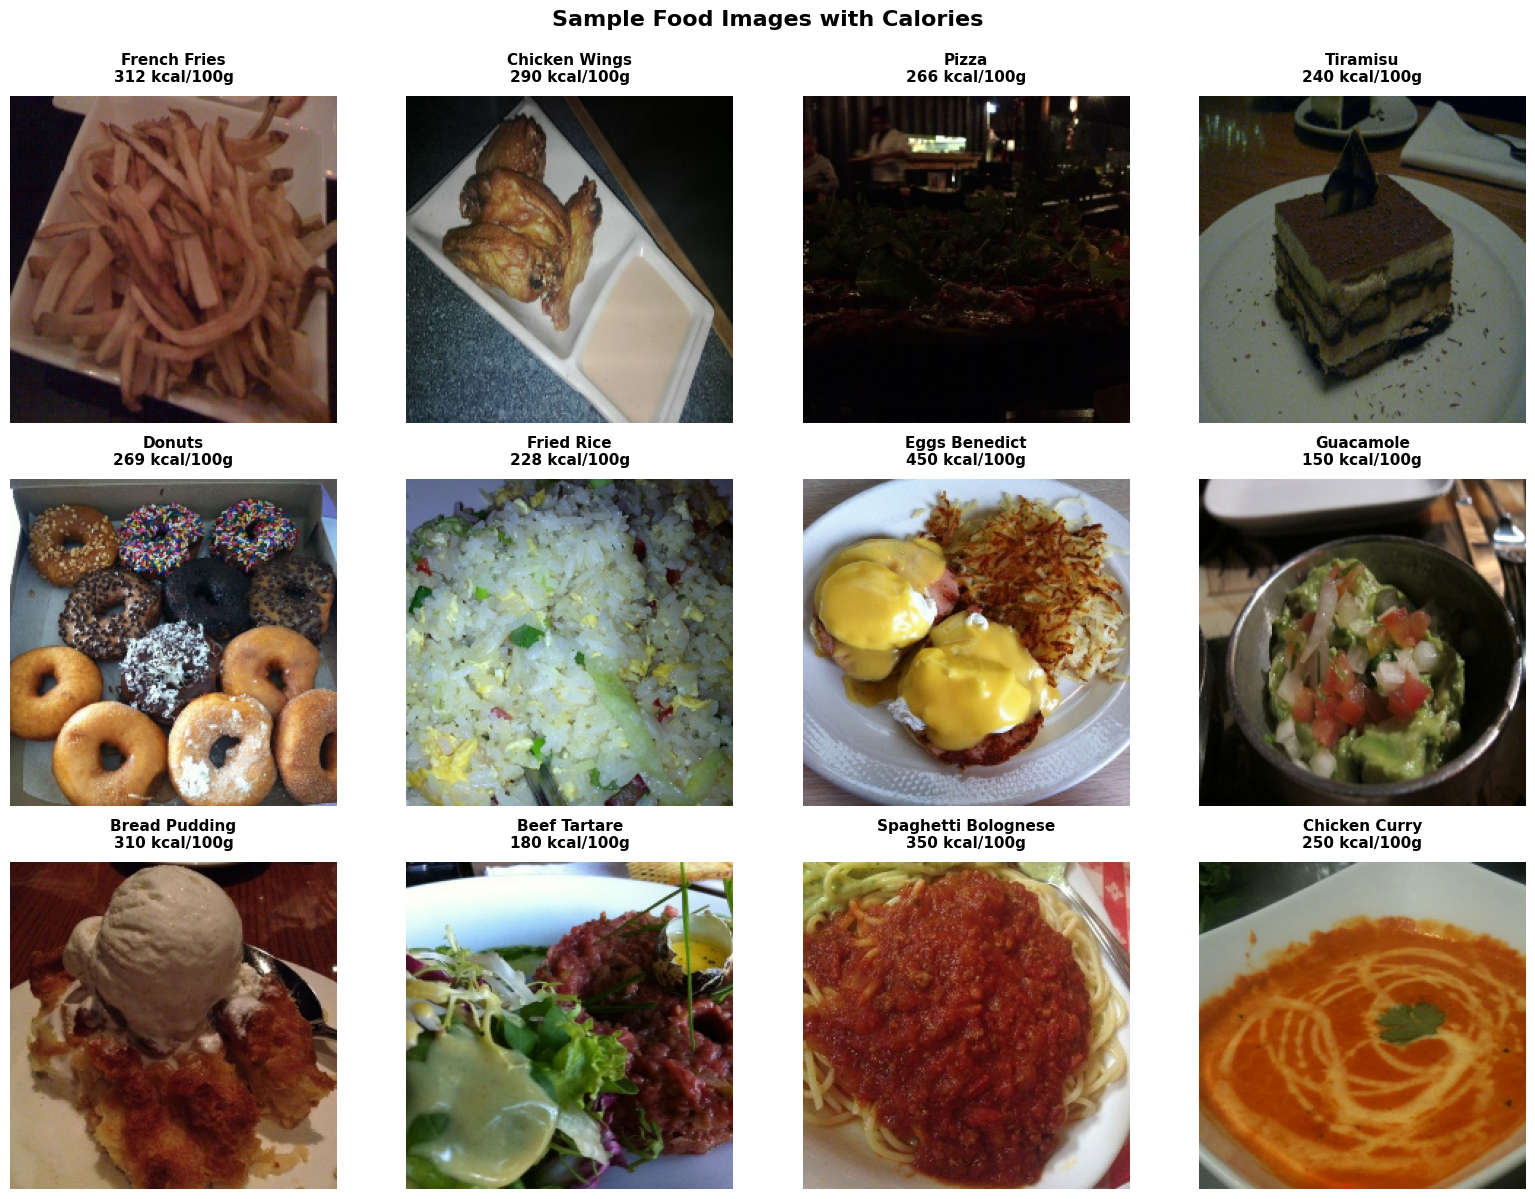

 Displayed and saved

3. Creating prediction examples...


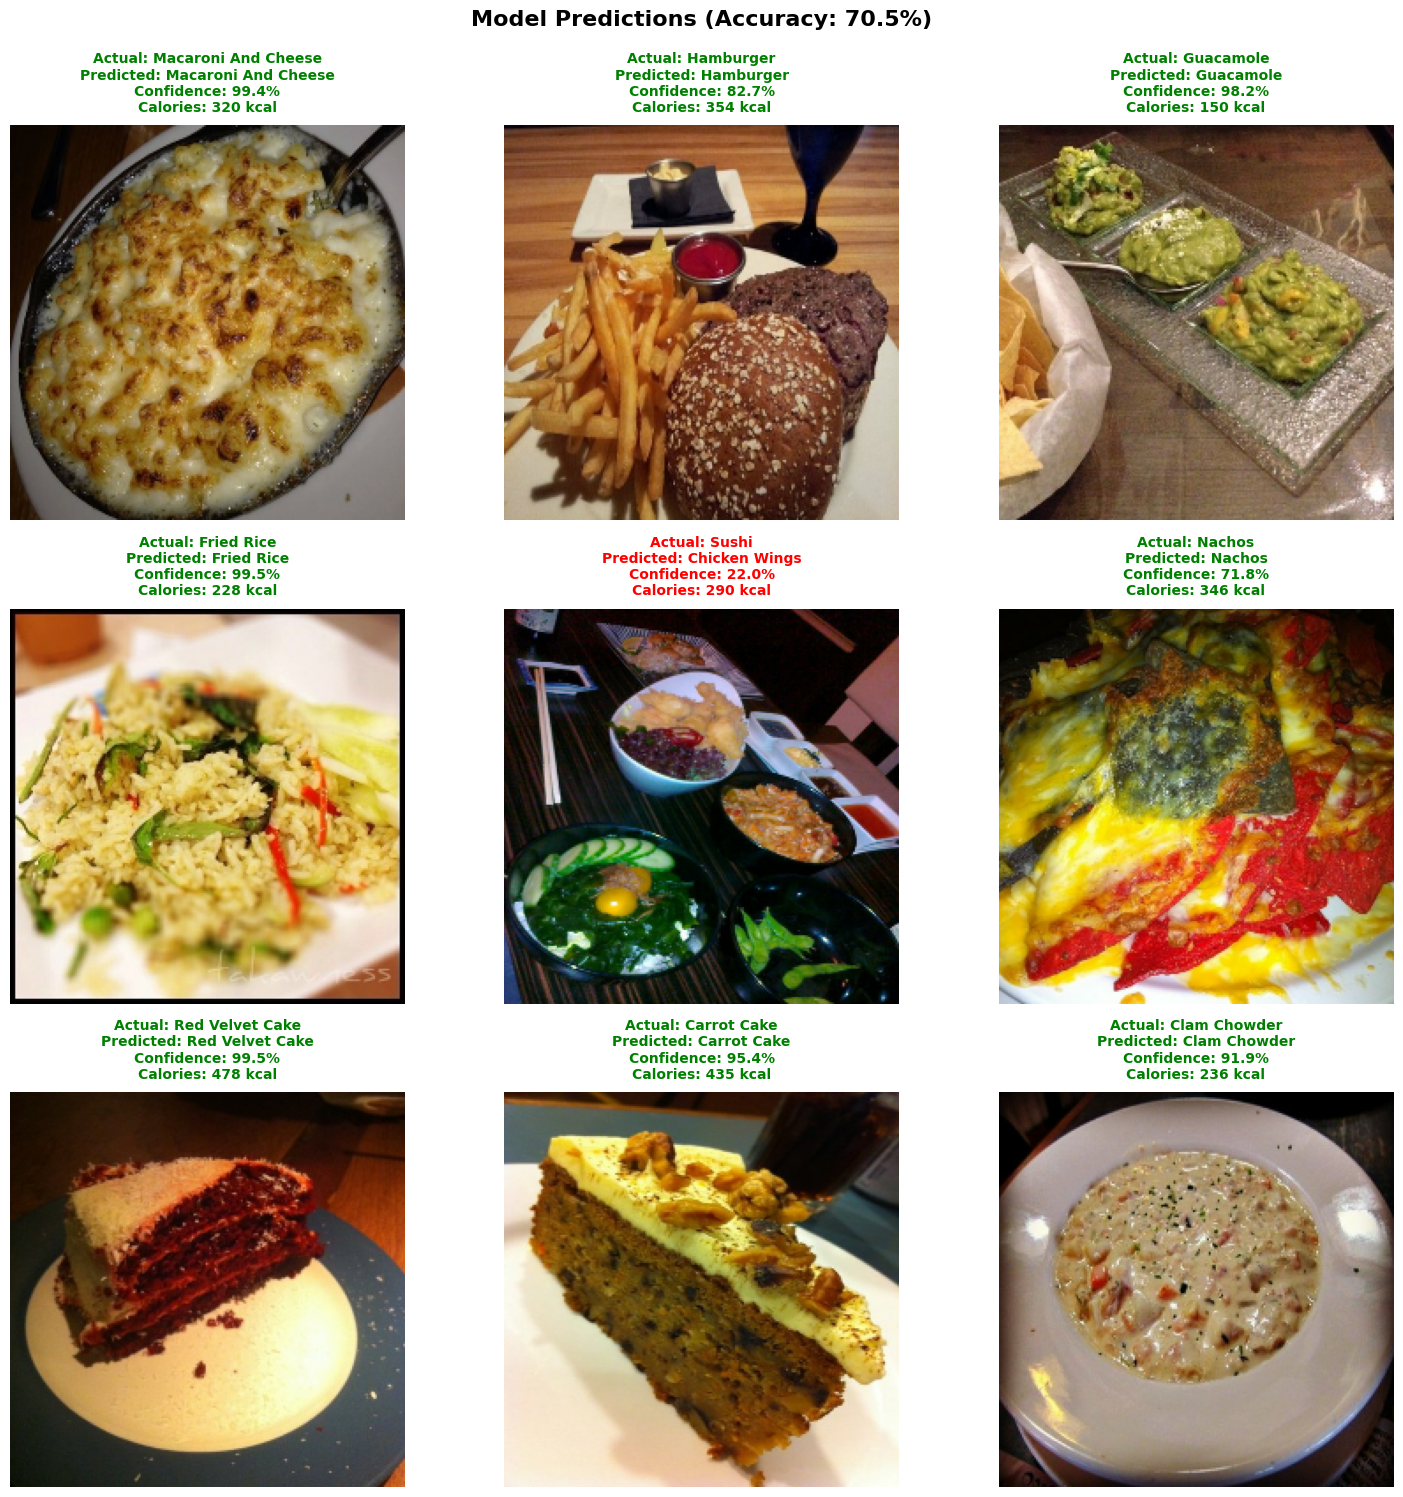

 Displayed and saved

4. Creating detailed prediction example...


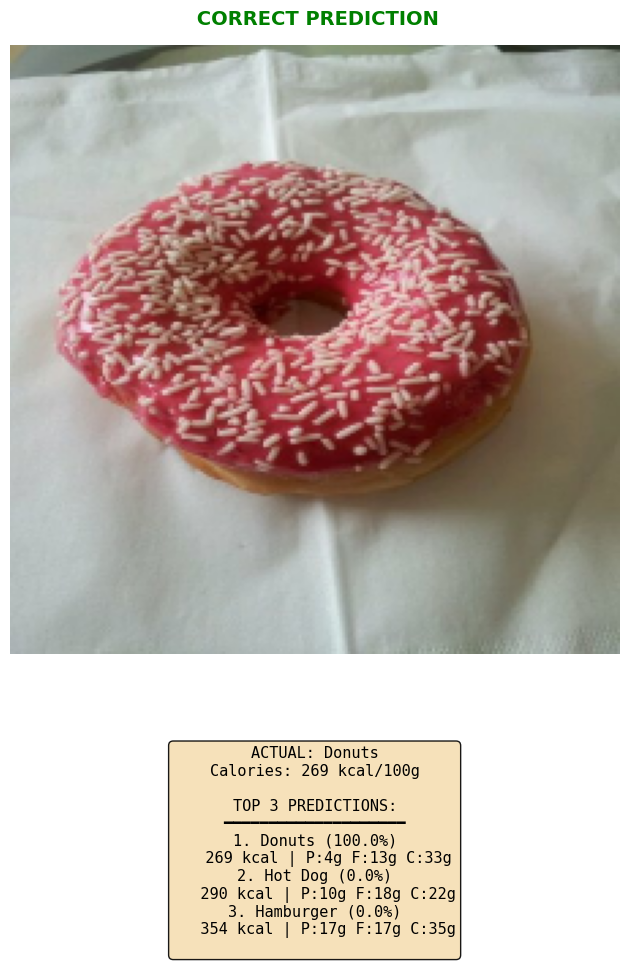

 Displayed and saved

COMPLETE!

Final Model Accuracy: 70.51%

All files saved to: /content/drive/MyDrive/AAI521-Final-Project/outputs

Generated visualizations:
  1. data_distribution.png
  2. sample_foods.png
  3. predictions.png
  4. detailed_prediction.png

Model files:
  - final_model_50class.keras
  - nutrition_database.json


In [1]:
# ==============================================================================
#  FOOD DETECTION - 50 CLASS: TRAIN + VISUALIZE
# ==============================================================================

from IPython.display import display, Javascript
display(Javascript('''
function KeepClicking(){
   console.log("Keeping connection alive");
   document.querySelector("colab-connect-button")?.click();
}
setInterval(KeepClicking, 60000);
'''))

import os
os.environ['TF_NUM_INTRAOP_THREADS'] = '4'
os.environ['TF_NUM_INTEROP_THREADS'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint

print("="*60)
print("FOOD DETECTION - 50 CLASSES WITH VISUALIZATION")
print("="*60)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

from google.colab import drive
drive.mount('/content/drive')

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import shutil
from collections import Counter

# --- NUTRITION DATABASE -------------------------------------------------------
NUTRITION_DB = {
    'pizza': {'calories': 266, 'protein': 11, 'fat': 10, 'carbs': 33},
    'hamburger': {'calories': 354, 'protein': 17, 'fat': 17, 'carbs': 35},
    'sushi': {'calories': 143, 'protein': 6, 'fat': 4, 'carbs': 21},
    'ice_cream': {'calories': 207, 'protein': 4, 'fat': 11, 'carbs': 24},
    'french_fries': {'calories': 312, 'protein': 4, 'fat': 15, 'carbs': 41},
    'donuts': {'calories': 269, 'protein': 4, 'fat': 13, 'carbs': 33},
    'apple_pie': {'calories': 237, 'protein': 2, 'fat': 11, 'carbs': 34},
    'chocolate_cake': {'calories': 352, 'protein': 5, 'fat': 14, 'carbs': 52},
    'hot_dog': {'calories': 290, 'protein': 10, 'fat': 18, 'carbs': 22},
    'pancakes': {'calories': 227, 'protein': 6, 'fat': 10, 'carbs': 28},
    'tacos': {'calories': 226, 'protein': 10, 'fat': 12, 'carbs': 20},
    'spaghetti_bolognese': {'calories': 350, 'protein': 12, 'fat': 14, 'carbs': 45},
    'chicken_wings': {'calories': 290, 'protein': 23, 'fat': 19, 'carbs': 5},
    'fried_rice': {'calories': 228, 'protein': 4, 'fat': 11, 'carbs': 29},
    'nachos': {'calories': 346, 'protein': 7, 'fat': 19, 'carbs': 36},
    'waffles': {'calories': 291, 'protein': 6, 'fat': 13, 'carbs': 37},
    'grilled_cheese_sandwich': {'calories': 440, 'protein': 18, 'fat': 26, 'carbs': 33},
    'lasagna': {'calories': 378, 'protein': 15, 'fat': 18, 'carbs': 38},
    'macaroni_and_cheese': {'calories': 320, 'protein': 11, 'fat': 15, 'carbs': 36},
    'cheesecake': {'calories': 321, 'protein': 6, 'fat': 23, 'carbs': 26},
    'tiramisu': {'calories': 240, 'protein': 5, 'fat': 13, 'carbs': 26},
    'french_toast': {'calories': 220, 'protein': 8, 'fat': 10, 'carbs': 25},
    'omelette': {'calories': 154, 'protein': 11, 'fat': 12, 'carbs': 1},
    'eggs_benedict': {'calories': 450, 'protein': 18, 'fat': 32, 'carbs': 20},
    'caesar_salad': {'calories': 184, 'protein': 8, 'fat': 14, 'carbs': 6},
    'greek_salad': {'calories': 106, 'protein': 3, 'fat': 8, 'carbs': 6},
    'caprese_salad': {'calories': 108, 'protein': 6, 'fat': 7, 'carbs': 4},
    'clam_chowder': {'calories': 236, 'protein': 8, 'fat': 17, 'carbs': 14},
    'miso_soup': {'calories': 40, 'protein': 2, 'fat': 1, 'carbs': 5},
    'ramen': {'calories': 436, 'protein': 13, 'fat': 16, 'carbs': 59},
    'pad_thai': {'calories': 380, 'protein': 12, 'fat': 14, 'carbs': 50},
    'spring_rolls': {'calories': 140, 'protein': 4, 'fat': 5, 'carbs': 20},
    'samosa': {'calories': 262, 'protein': 5, 'fat': 16, 'carbs': 25},
    'gyoza': {'calories': 64, 'protein': 3, 'fat': 2, 'carbs': 8},
    'dumplings': {'calories': 41, 'protein': 2, 'fat': 1, 'carbs': 6},
    'beef_tartare': {'calories': 180, 'protein': 20, 'fat': 11, 'carbs': 0},
    'ceviche': {'calories': 120, 'protein': 18, 'fat': 3, 'carbs': 6},
    'bruschetta': {'calories': 109, 'protein': 3, 'fat': 5, 'carbs': 13},
    'hummus': {'calories': 166, 'protein': 8, 'fat': 10, 'carbs': 14},
    'guacamole': {'calories': 150, 'protein': 2, 'fat': 14, 'carbs': 8},
    'fish_and_chips': {'calories': 585, 'protein': 25, 'fat': 34, 'carbs': 44},
    'chicken_curry': {'calories': 250, 'protein': 18, 'fat': 15, 'carbs': 12},
    'steak': {'calories': 271, 'protein': 25, 'fat': 19, 'carbs': 0},
    'pork_chop': {'calories': 231, 'protein': 23, 'fat': 15, 'carbs': 0},
    'lobster_bisque': {'calories': 200, 'protein': 8, 'fat': 15, 'carbs': 8},
    'scallops': {'calories': 137, 'protein': 24, 'fat': 2, 'carbs': 6},
    'oysters': {'calories': 68, 'protein': 7, 'fat': 2, 'carbs': 4},
    'red_velvet_cake': {'calories': 478, 'protein': 5, 'fat': 21, 'carbs': 68},
    'carrot_cake': {'calories': 435, 'protein': 5, 'fat': 21, 'carbs': 58},
    'bread_pudding': {'calories': 310, 'protein': 7, 'fat': 13, 'carbs': 42}
}

# --- Load dataset -------------------------------------------------------------
import kagglehub
kaggle_path = kagglehub.dataset_download('dansbecker/food-101')
kaggle_base = Path(kaggle_path)
IMAGES_DIR = list(kaggle_base.rglob("images"))[0]
SOURCE_META = list(kaggle_base.rglob("meta"))[0]

DEST_META = Path("/content/drive/MyDrive/AAI521-Final-Project/data/food-101/meta")
if not DEST_META.exists():
    DEST_META.parent.mkdir(parents=True, exist_ok=True)
    shutil.copytree(SOURCE_META, DEST_META)

META_DIR = DEST_META
SAVE_DIR = Path("/content/drive/MyDrive/AAI521-Final-Project/outputs")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

SELECTED_CLASSES = [
    'pizza', 'hamburger', 'sushi', 'ice_cream', 'french_fries',
    'donuts', 'apple_pie', 'chocolate_cake', 'hot_dog', 'pancakes',
    'tacos', 'spaghetti_bolognese', 'chicken_wings', 'fried_rice', 'nachos',
    'waffles', 'grilled_cheese_sandwich', 'lasagna', 'macaroni_and_cheese', 'cheesecake',
    'tiramisu', 'french_toast', 'omelette', 'eggs_benedict', 'caesar_salad',
    'greek_salad', 'caprese_salad', 'clam_chowder', 'miso_soup', 'ramen',
    'pad_thai', 'spring_rolls', 'samosa', 'gyoza', 'dumplings',
    'beef_tartare', 'ceviche', 'bruschetta', 'hummus', 'guacamole',
    'fish_and_chips', 'chicken_curry', 'steak', 'pork_chop', 'lobster_bisque',
    'scallops', 'oysters', 'red_velvet_cake', 'carrot_cake', 'bread_pudding'
]

class_to_idx = {c: i for i, c in enumerate(SELECTED_CLASSES)}

# --- Load data ----------------------------------------------------------------
def read_list(p):
    with open(p, 'r') as f:
        return [ln.strip() for ln in f if ln.strip()]

all_train = read_list(META_DIR / "train.txt")
all_test  = read_list(META_DIR / "test.txt")

train_list = [line for line in all_train if line.split("/")[0] in SELECTED_CLASSES]
test_list  = [line for line in all_test  if line.split("/")[0] in SELECTED_CLASSES]

random.shuffle(train_list)

def create_pairs(file_list):
    pairs = []
    for stem in file_list:
        cls, base = stem.split("/", 1)
        if cls not in SELECTED_CLASSES:
            continue
        path = str(IMAGES_DIR / cls / f"{base}.jpg")
        label = class_to_idx[cls]
        pairs.append((path, label))
    return pairs

train_pairs = create_pairs(train_list)
test_pairs  = create_pairs(test_list)
random.shuffle(train_pairs)

def decode_resize(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = preprocess_input(img)
    return img, label

train_paths, train_labels = zip(*train_pairs)
test_paths, test_labels   = zip(*test_pairs)

train_ds = (
    tf.data.Dataset
      .from_tensor_slices((list(train_paths), list(train_labels)))
      .shuffle(len(train_pairs))
      .map(decode_resize, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(BATCH_SIZE)
      .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    tf.data.Dataset
      .from_tensor_slices((list(test_paths), list(test_labels)))
      .map(decode_resize, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(BATCH_SIZE)
      .prefetch(tf.data.AUTOTUNE)
)

# --- Build model --------------------------------------------------------------
inputs = layers.Input(shape=(224, 224, 3))
base = MobileNetV2(include_top=False, weights='imagenet')
base.trainable = False

x = base(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(50, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model ready\n")

# --- Train --------------------------------------------------------------------
print("="*60)
print("TRAINING")
print("="*60 + "\n")

callbacks = [
    ModelCheckpoint(str(SAVE_DIR / 'model_50class.keras'),
                   monitor='val_accuracy', save_best_only=True, verbose=1)
]

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# --- Evaluate -----------------------------------------------------------------
results = model.evaluate(test_ds, verbose=0)
loss, accuracy = results

print("\n" + "="*60)
print("FINAL TRAINING RESULTS")
print("="*60)
print(f"Test Accuracy: {accuracy:.2%}")
print(f"Test Loss: {loss:.4f}\n")

# Save model and nutrition data
model.save(SAVE_DIR / 'final_model_50class.keras')

with open(SAVE_DIR / 'nutrition_database.json', 'w') as f:
    json.dump(NUTRITION_DB, f, indent=2)

# ==============================================================================
# VISUALIZATION SECTION
# ==============================================================================
print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60 + "\n")

def get_random_image(food_class):
    """Get a random image for a food class"""
    class_dir = IMAGES_DIR / food_class
    images = list(class_dir.glob("*.jpg"))
    if images:
        img_path = random.choice(images)
        img = tf.io.read_file(str(img_path))
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (224, 224))
        return img.numpy().astype('uint8'), str(img_path)
    return None, None

def predict_food(image_path):
    """Predict food and return results with nutrition"""
    img = tf.io.read_file(str(image_path))
    img = tf.image.decode_jpeg(img, channels=3)
    img_display = tf.image.resize(img, (224, 224)).numpy().astype('uint8')
    img = tf.image.resize(img, (224, 224))
    img = preprocess_input(img)
    img = tf.expand_dims(img, 0)

    predictions = model.predict(img, verbose=0)[0]
    top_indices = np.argsort(predictions)[-3:][::-1]

    results = []
    for idx in top_indices:
        food_name = SELECTED_CLASSES[idx]
        confidence = predictions[idx] * 100
        nutrition = NUTRITION_DB.get(food_name, {})

        results.append({
            'food': food_name.replace('_', ' ').title(),
            'food_raw': food_name,
            'confidence': confidence,
            'calories': nutrition.get('calories', '?'),
            'protein': nutrition.get('protein', '-'),
            'fat': nutrition.get('fat', '-'),
            'carbs': nutrition.get('carbs', '-')
        })

    return img_display, results

# 1. Data Distribution
print("1. Creating data distribution plot...")
train_counts = Counter([line.split("/")[0] for line in train_list])
test_counts = Counter([line.split("/")[0] for line in test_list])

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
classes_display = [c.replace('_', ' ').title() for c in SELECTED_CLASSES]
train_values = [train_counts[c] for c in SELECTED_CLASSES]

ax.barh(classes_display, train_values, color='skyblue', edgecolor='navy')
ax.set_xlabel('Number of Training Samples', fontsize=12, fontweight='bold')
ax.set_title('Training Data Distribution (50 Classes)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(train_values):
    ax.text(v + 10, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.savefig(SAVE_DIR / 'data_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print(" Displayed and saved\n")

# 2. Sample Images with Calories (3x4 grid for viewing)
print("2. Creating sample food images...")
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

sample_foods = random.sample(SELECTED_CLASSES, 12)

for idx, food_class in enumerate(sample_foods):
    img, _ = get_random_image(food_class)

    if img is not None:
        axes[idx].imshow(img)
        nutrition = NUTRITION_DB.get(food_class, {})
        calories = nutrition.get('calories', '?')
        title = f"{food_class.replace('_', ' ').title()}\n{calories} kcal/100g"
        axes[idx].set_title(title, fontsize=11, pad=10, fontweight='bold')

    axes[idx].axis('off')

plt.suptitle('Sample Food Images with Calories', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(SAVE_DIR / 'sample_foods.png', dpi=150, bbox_inches='tight')
plt.show()
print(" Displayed and saved\n")

# 3. Model Predictions with Nutrition
print("3. Creating prediction examples...")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

prediction_foods = random.sample(SELECTED_CLASSES, 9)

for idx, food_class in enumerate(prediction_foods):
    img, img_path = get_random_image(food_class)

    if img_path:
        img_display, predictions = predict_food(img_path)

        ax = axes[idx]
        ax.imshow(img_display)

        actual = food_class.replace('_', ' ').title()
        pred = predictions[0]

        is_correct = pred['food_raw'] == food_class
        color = 'green' if is_correct else 'red'

        title = f"Actual: {actual}\n"
        title += f"Predicted: {pred['food']}\n"
        title += f"Confidence: {pred['confidence']:.1f}%\n"
        title += f"Calories: {pred['calories']} kcal"

        ax.set_title(title, fontsize=10, color=color, fontweight='bold', pad=10)
        ax.axis('off')

plt.suptitle(f'Model Predictions (Accuracy: {accuracy:.1%})',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(SAVE_DIR / 'predictions.png', dpi=150, bbox_inches='tight')
plt.show()
print(" Displayed and saved\n")

# 4. Detailed Prediction with Top-3
print("4. Creating detailed prediction example...")
food_class = random.choice(SELECTED_CLASSES)
img, img_path = get_random_image(food_class)

if img_path:
    img_display, predictions = predict_food(img_path)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img_display)

    actual = food_class.replace('_', ' ').title()
    actual_nutrition = NUTRITION_DB.get(food_class, {})

    text = f"ACTUAL: {actual}\n"
    text += f"Calories: {actual_nutrition.get('calories', '?')} kcal/100g\n\n"
    text += "TOP 3 PREDICTIONS:\n"
    text += "━━━━━━━━━━━━━━━━━━━━\n"

    for i, pred in enumerate(predictions, 1):
        text += f"{i}. {pred['food']} ({pred['confidence']:.1f}%)\n"
        text += f"   {pred['calories']} kcal | "
        text += f"P:{pred['protein']}g F:{pred['fat']}g C:{pred['carbs']}g\n"

    is_correct = predictions[0]['food_raw'] == food_class
    color = 'green' if is_correct else 'red'

    ax.text(0.5, -0.15, text, transform=ax.transAxes,
           fontsize=11, verticalalignment='top', horizontalalignment='center',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9),
           family='monospace')

    ax.set_title(' CORRECT PREDICTION' if is_correct else '✗ INCORRECT PREDICTION',
                color=color, fontsize=14, fontweight='bold', pad=15)
    ax.axis('off')

    plt.tight_layout()
    plt.savefig(SAVE_DIR / 'detailed_prediction.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(" Displayed and saved\n")

# Summary
print("="*60)
print("COMPLETE!")
print("="*60)
print(f"\nFinal Model Accuracy: {accuracy:.2%}")
print(f"\nAll files saved to: {SAVE_DIR}")
print("\nGenerated visualizations:")
print("  1. data_distribution.png")
print("  2. sample_foods.png")
print("  3. predictions.png")
print("  4. detailed_prediction.png")
print("\nModel files:")
print("  - final_model_50class.keras")
print("  - nutrition_database.json")
print("="*60)